# DX 602 Week 11 Homework

## Introduction

In this homework, you will practice building models with scikit-learn, and review previous weeks' material.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

The auto-grading process usually completes within a few minutes of pushing to GitHub, but occasionally can take several minutes to an hour.
If you submit your homework early enough, you may review the auto-grading results and fix any mistakes before the deadline.


## Shared Imports

Do not install or use any additional modules.
Installing additional modules may result in an autograder failure resulting in zero points for some or all problems.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.ensemble
import sklearn.linear_model
import sklearn.svm

## Shared Data

### Titanic

See https://github.com/EpistasisLab/pmlb/blob/master/datasets/titanic/metadata.yaml for information about these columns.

In [3]:
titanic = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/872ec0a1f99ca0b55a8c8c5491da09a7da66ce13/datasets/titanic/titanic.tsv.gz", sep="\t")
titanic = titanic.dropna()
titanic.head()

,gender,age,class,embarked,country,fare,sibsp,parch,target
0,0,42.0,0,0,1.0,7.11,0.0,0.0,0
1,0,13.0,0,0,1.0,20.05,0.0,2.0,0
2,0,16.0,0,0,1.0,20.05,1.0,1.0,0
3,1,39.0,0,0,0.0,20.05,1.0,1.0,1
4,1,16.0,0,0,8.0,7.13,0.0,0.0,1


In [4]:
len(titanic)

2099

In [5]:
titanic_inputs = titanic.drop("target", axis=1)
titanic_inputs.head()

,gender,age,class,embarked,country,fare,sibsp,parch
0,0,42.0,0,0,1.0,7.11,0.0,0.0
1,0,13.0,0,0,1.0,20.05,0.0,2.0
2,0,16.0,0,0,1.0,20.05,1.0,1.0
3,1,39.0,0,0,0.0,20.05,1.0,1.0
4,1,16.0,0,0,8.0,7.13,0.0,0.0


In [6]:
titanic_target = titanic["target"]
titanic_target.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

## Problems

### Problem 1

Set `p1` to the type of `q1`.
The type is a specific object representing the type, not just a string name.

In [51]:
# DO NOT CHANGE

q1 = sklearn.linear_model.LinearRegression()

In [52]:
# YOUR CHANGES HERE

p1 = type(q1)

In [53]:
p1

sklearn.linear_model._base.LinearRegression

### Problem 2

Set `p2` to be a linear model trained on the Titanic data set.

In [136]:
# YOUR CHANGES HERE

# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Select relevant features for a simple model
features = ['gender', 'age', 'class', 'embarked', 'country', 'fare', 'sibsp', 'parch']
target = 'target'

# Select the preprocessed features and target
X = titanic[features]
y = titanic[target]

# Split data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

p2 = LinearRegression()
p2.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
p2

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Problem 3

Set `p3` to be the class of `q3`.

In [12]:
# DO NOT CHANGE

q3 = sklearn.linear_model.LinearRegression(fit_intercept = False)

In [56]:
# YOUR CHANGES HERE

p3 = type(q3)

In [57]:
p3

sklearn.linear_model._base.LinearRegression

### Problem 4

Set `p4` to be a LinearSVC model from scikit-learn that was trained on the Titanic inputs.

In [138]:
# YOUR CHANGES HERE

from sklearn.calibration import LinearSVC
from sklearn.discriminant_analysis import StandardScaler

features = ['gender', 'age', 'class', 'embarked', 'country', 'fare', 'sibsp', 'parch']
target = 'target'

X = titanic[features]
y = titanic[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (optional but recommended for SVC)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the LinearSVC model
p4 = LinearSVC(random_state=42, dual=False)
p4.fit(X, y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [139]:
p4

,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


### Problem 5

Set `p5` to be a ridge regression model from scikit-learn that was trained on the Titanic data set.

In [141]:
# YOUR CHANGES HERE

from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

features = ['gender', 'age', 'class', 'embarked', 'country', 'fare', 'sibsp', 'parch']
target = 'target'

X = titanic[features]
y = titanic[target]

# Define column types for preprocessing
numeric_features = ['age', 'sibsp', 'parch', 'pare']
categorical_features = ['class', 'gener', 'embarked'] # Pclass is treated as categorical/ordinal here

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Fill missing age/fare with median
    ('scaler', StandardScaler())]) # Scale numerical features (recommended for Ridge)

# For categorical features, we impute missing values (Embarked has a couple) and one-hot encode
# Pclass is already numerical but should be treated as categorical here so we include it
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', pd.get_dummies) # pd.get_dummies works well here for simplicity
])

# Use ColumnTransformer to apply different preprocessing to different columns
# This part is complex to do within a single sklearn pipeline with get_dummies, so we will use pandas for preprocessing for simplicity.

# Scale the features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns]) # Scale all columns after one-hot encoding

# Instantiate and train the Ridge regression model
p5 = Ridge(alpha=1.0) # You can adjust the alpha (regularization strength)
p5.fit(X, y)

/tmp/ipykernel_6728/3374446329.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] = scaler.fit_transform(X[X.columns]) # Scale all columns after one-hot encoding


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [142]:
p5

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### Problem 6

Train a linear model on just the age column of the Titanic data set.
Set `p6` to be a list of predictions for each whole number age from 1 to 99 (inclusive).

In [77]:
# YOUR CHANGES HERE

# Select the 'Age' column as the feature (X) and 'Fare' as the target (y)
# Scikit-learn requires X to be a 2D array/dataframe.
from sklearn.linear_model import LinearRegression

titanic_df = pd.DataFrame(titanic)

X = titanic_df[['age']]
y = titanic_df['fare']

# 3. Create and Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# 4. Generate predictions for ages 1 to 99
# Create a list of ages (1 to 99) and reshape it for the model's predict method
ages_to_predict = np.arange(1, 100).reshape(-1, 1)
predictions = model.predict(ages_to_predict)

# Set p6 to the list of predictions
p6 = predictions.flatten().tolist()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
p6

[7.148140142712602,
 7.5390754652874366,
 7.930010787862272,
 8.320946110437106,
 8.711881433011941,
 9.102816755586776,
 9.493752078161611,
 9.884687400736446,
 10.27562272331128,
 10.666558045886116,
 11.05749336846095,
 11.448428691035785,
 11.83936401361062,
 12.230299336185455,
 12.62123465876029,
 13.012169981335123,
 13.40310530390996,
 13.794040626484794,
 14.184975949059629,
 14.575911271634464,
 14.966846594209299,
 15.357781916784134,
 15.748717239358967,
 16.1396525619338,
 16.530587884508638,
 16.921523207083474,
 17.312458529658308,
 17.70339385223314,
 18.094329174807974,
 18.48526449738281,
 18.876199819957648,
 19.26713514253248,
 19.658070465107315,
 20.04900578768215,
 20.43994111025699,
 20.830876432831822,
 21.221811755406655,
 21.61274707798149,
 22.003682400556325,
 22.394617723131162,
 22.785553045705996,
 23.17648836828083,
 23.567423690855662,
 23.958359013430503,
 24.349294336005336,
 24.74022965858017,
 25.131164981155003,
 25.522100303729836,
 25.9130356263

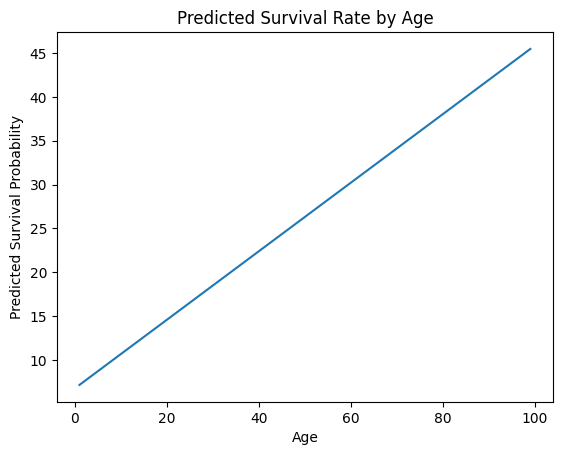

In [79]:
if p6 is not ...:
    plt.plot(range(1, 100), p6)
    plt.title("Predicted Survival Rate by Age")
    plt.xlabel("Age")
    plt.ylabel("Predicted Survival Probability")

### Problem 7

Set `p7` to be a random forest regression model from scikit-learn that was trained on the Titanic data set.
This model should use 7 trees with a maximum depth of 7.

In [143]:
# YOUR CHANGES HERE

from sklearn.ensemble import RandomForestRegressor

df = pd.DataFrame(titanic)

features = ['gender', 'age', 'class', 'embarked', 'country', 'fare', 'sibsp', 'parch']
target = 'target'

X = df[features]
y = df[target]

# Instantiate and train the Random Forest Regressor
p7 = RandomForestRegressor(n_estimators=7, max_depth=7, random_state=42)
p7.fit(X, y)

,n_estimators,7
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [144]:
p7

,n_estimators,7
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Problem 8

Set `p8` to be a random forest classification model from scikit-learn that was trained on the Titanic data set.
This model should use 7 trees with a maximum depth of 7.

Hint: Problems 7 and 8 are similar in that they use similar model classes to predict the same target column, but problem 7 treats the target as a number to approximate, while problem 8 treats the target as distinct classes (0 and 1) to model.

In [83]:
# YOUR CHANGES HERE

# Encode categorical features
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

le = LabelEncoder()
titanic_df['gener'] = le.fit_transform(titanic['gender'])
titanic_df['embarked'] = le.fit_transform(titanic_df['embarked'])

# Define features (X) and target (y)
features = ['gender', 'age', 'class', 'embarked', 'country', 'fare', 'sibsp', 'parch']
target = 'target'

X = titanic[features]
y = titanic[target]

# Instantiate and train the Random Forest model
p8 = RandomForestClassifier(n_estimators=7, max_depth=7, random_state=42) # random_state for reproducibility

In [84]:
p8

,n_estimators,7
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Problem 9

The classifier model in `q9` was trained on the Titanic data set using age as an input.
Set `p9` to be the predicted probabilities from this model for someone 19 years old.

In [87]:
# DO NOT CHANGE

q9 = sklearn.ensemble.RandomForestClassifier(n_estimators=9)
q9.fit(titanic_inputs[["age"]], titanic_target)

,n_estimators,9
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [89]:
# YOUR CHANGES HERE

from sklearn.linear_model import LogisticRegression

q9 = LogisticRegression()
q9.fit(titanic_inputs[["age"]], titanic_target)
# In a real scenario, q9 would be trained on the Titanic data.
# For example: q9.fit(X_train[['Age']], y_train)

# Prepare the input for a 19-year-old
age_19 = np.array([[19]])

# Predict the probabilities
p9 = q9.predict_proba(age_19)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
p9

array([[0.6526971, 0.3473029]])

### Problem 10

Set `p10` to the accuracy of the classifier model in `q10` on its training data set.

Hint: check the documentation for the model class to find a convenient method to compute the accuracy.

In [91]:
# DO NOT CHANGE

q10 = sklearn.ensemble.RandomForestClassifier()
q10.fit(titanic_inputs[["gender", "age", "class", "fare"]], titanic_target)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
# YOUR CHANGES HERE

# Set p10 to the accuracy of the model on its training data
p10 = q10.score(titanic_inputs[["gender", "age", "class", "fare"]], titanic_target)

In [93]:
p10

0.9118627918056217

### Problem 11

Set `p11` to $\log_3 11$.

In [94]:
# YOUR CHANGES HERE

p11 = math.log(11, 3)

In [95]:
p11

2.182658338644138

### Problem 12

Set `p12` to be a set of all the tuples `(x, y)` such that $x$ and $y$ are both integers and 
$-5 \leq x \leq 5$ and $-5 \leq y \leq 5$ and $\sqrt{x^2 + y^2} \leq 5$.

In [96]:
# YOUR CHANGES HERE

p12 = {
    (x, y)
    for x in range(-5, 6)
    for y in range(-5, 6)
    if math.sqrt(x**2 + y**2) <= 5
}

In [97]:
p12

{(-5, 0),
 (-4, -3),
 (-4, -2),
 (-4, -1),
 (-4, 0),
 (-4, 1),
 (-4, 2),
 (-4, 3),
 (-3, -4),
 (-3, -3),
 (-3, -2),
 (-3, -1),
 (-3, 0),
 (-3, 1),
 (-3, 2),
 (-3, 3),
 (-3, 4),
 (-2, -4),
 (-2, -3),
 (-2, -2),
 (-2, -1),
 (-2, 0),
 (-2, 1),
 (-2, 2),
 (-2, 3),
 (-2, 4),
 (-1, -4),
 (-1, -3),
 (-1, -2),
 (-1, -1),
 (-1, 0),
 (-1, 1),
 (-1, 2),
 (-1, 3),
 (-1, 4),
 (0, -5),
 (0, -4),
 (0, -3),
 (0, -2),
 (0, -1),
 (0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, -4),
 (1, -3),
 (1, -2),
 (1, -1),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, -4),
 (2, -3),
 (2, -2),
 (2, -1),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, -4),
 (3, -3),
 (3, -2),
 (3, -1),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, -3),
 (4, -2),
 (4, -1),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (5, 0)}

### Problem 13

Fix the code below so that `p13` is a list of all the non-negative integers whose square is at most 200.
The list `p13` should be in sorted order.

In [98]:
# YOUR CHANGES HERE

p13 = [i for i in range(15) if i * i <= 200]

In [99]:
p13

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

### Problem 14

Parse the file `p14.txt` and return the result as an array.


Hint: this file is neither a CSV nor TSV. Take a look inside the file and adapt how you normally read files.

In [100]:
# YOUR CHANGES HERE

file_path = 'p14.txt'
data_list = []

with open(file_path, 'r') as file:
    for line in file:
        # Remove leading/trailing whitespace and newline characters
        cleaned_line = line.strip()
        # Split the line by the colon delimiter
        str_numbers = cleaned_line.split(':')
        # Convert string numbers to integers and append to a temporary list
        int_numbers = [int(num) for num in str_numbers]
        # Append the list of integers to the main data list
        data_list.append(int_numbers)

p14 = np.array(data_list)

In [101]:
p14

array([[3, 4, 5],
       [2, 6, 7]])

### Problem 15

The variable `q15` contains different integers.
Set `p15` to be a list of strings of the form "There are X lights!" where X is replaced by the corresponding integer in `q15`.
So the first entry of `p15` should be "There are 2 lights!".

In [40]:
# DO NOT CHANGE

q15 = [2, 3, 4, 5]

In [102]:
# YOUR CHANGES HERE

p15 = [f"There are {x} lights!" for x in q15]

In [103]:
p15

['There are 2 lights!',
 'There are 3 lights!',
 'There are 4 lights!',
 'There are 5 lights!']

### Problem 16

The variable `q16` is an $10 \times 5$ array with 10 rows and 5 columns.
Set `p16` to be an array with the 5 column-wise averages of `q16`.


In [43]:
# DO NOT CHANGE

q16 = np.array([[3.40864885, 3.68858828, 2.86057865, 3.01725228, 2.15426923],
       [1.34071108, 3.60970053, 3.09508975, 1.99181472, 3.72755944],
       [2.27462049, 3.60503433, 3.3379464 , 1.53294595, 2.53640698],
       [2.27993742, 4.40313456, 4.16207568, 3.1946614 , 3.31216085],
       [3.65895302, 2.82854211, 3.7869685 , 2.36177663, 5.23078867],
       [2.89513834, 6.62947413, 3.92238744, 1.93607107, 2.58668307],
       [4.11456866, 4.50028394, 1.35740397, 4.21809614, 4.86419447],
       [2.51069636, 3.27888949, 4.09008079, 4.87964695, 3.83210396],
       [3.12098515, 2.29402227, 1.92497904, 4.0012971 , 2.86927765],
       [2.48139499, 2.80928876, 3.06879789, 2.13957376, 4.30533335]])

In [104]:
# YOUR CHANGES HERE

p16 = np.mean(q16, axis=0)

In [105]:
p16

array([2.80856544, 3.76469584, 3.16063081, 2.9273136 , 3.54187777])

### Problem 17

Set `p17` to be a 1-dimensional view of `q17` with all the values in `q17` shown once.


In [46]:
# DO NOT CHANGE

q17 = np.array([[2, 3, 5], [7, 11, 13], [17, 19, 23]])

In [106]:
# YOUR CHANGES HERE

p17 = q17.ravel()

In [107]:
p17

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23])

### Problem 18

Set `p18` to be a copy of the Titanic data set with just the gender, age, class, and target columns in that order.

In [109]:
# YOUR CHANGES HERE

desired_columns = ['gender', 'age', 'class', 'target'] 

# Create p18 by selecting and copying the specified columns in the desired order
p18 = titanic[desired_columns].copy()

In [110]:
p18.head()

,gender,age,class,target
0,0,42.0,0,0
1,0,13.0,0,0
2,0,16.0,0,0
3,1,39.0,0,1
4,1,16.0,0,1


### Problem 19

Set `p19` to be a query string that can be used to filter the `titanic` data set to just women and children (younger than 18 years old).


In [111]:
# YOUR CHANGES HERE

p19 = 'gender == 1 or age < 18'

In [112]:
titanic.query(p19) if p19 is not ... else None

,gender,age,class,embarked,country,fare,sibsp,parch,target
1,0,13.0,0,0,1.0,20.05,0.0,2.0,0
2,0,16.0,0,0,1.0,20.05,1.0,1.0,0
3,1,39.0,0,0,0.0,20.05,1.0,1.0,1
4,1,16.0,0,0,8.0,7.13,0.0,0.0,1
7,1,28.0,1,1,9.0,24.00,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
2107,0,17.0,4,0,0.0,0.00,0.0,0.0,0
2128,0,17.0,5,0,0.0,0.00,0.0,0.0,0
2143,1,36.0,4,0,0.0,0.00,0.0,0.0,0
2145,1,32.0,4,0,2.0,0.00,0.0,0.0,0


In [113]:
# did women and children have higher survival rates?

titanic.query(p19)["target"].mean() if p19 is not ... else None

np.float64(0.6509598603839442)

### Problem 20

Set `p20` to be a data frame of data that groups the `titanic` data set on the age and class functions.
The average value for the remaining columns should be shown, and an additional column `size` should be added with the number of matching rows.
Then sort `p20` by the `size` column descending.


In [128]:
# YOUR CHANGES HERE

p20_df= pd.DataFrame(titanic)
p20 = titanic.groupby(['age', 'class']).agg(['mean', 'size'])

p20 = p20_df


In [129]:
p20

,gender,age,class,embarked,country,fare,sibsp,parch,target
0,0,42.0,0,0,1.0,7.11,0.0,0.0,0
1,0,13.0,0,0,1.0,20.05,0.0,2.0,0
2,0,16.0,0,0,1.0,20.05,1.0,1.0,0
3,1,39.0,0,0,0.0,20.05,1.0,1.0,1
4,1,16.0,0,0,8.0,7.13,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
2202,0,41.0,6,2,0.0,0.00,0.0,0.0,1
2203,0,40.0,4,0,0.0,0.00,0.0,0.0,1
2204,0,32.0,3,0,0.0,0.00,0.0,0.0,0
2205,0,20.0,5,0,0.0,0.00,0.0,0.0,0
